Data characteristics for using/learning PCA:

- Multiple features with correlation: The dataset should have several features that are correlated with each other, as PCA's main purpose is to reduce dimensionality by identifying these correlations.

- Multidimensionality: The dataset should ideally have more than two or three dimensions to effectively showcase the dimensionality reduction aspect of PCA.

- Simple structure for ituition: The dataset should be easy to visualize (2D or 3D)

Goal of PCA: "decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance" ([sklearn](https://scikit-learn.org/stable/modules/decomposition.html#exact-pca-and-probabilistic-interpretation))

Steps of PCA:

1. Standardize data (in sklearn's PCA, already standardization included)

$$ X = \frac{X-\mu}{\sigma} $$

2. Covariance matrix (feature multilinearity/correlation), $n$ is number of samples

$$ Var(X) = \Sigma = \frac{1}{n-1} X^T X $$

3. Method 1: Eigenvectors, eigenvalues of the covariance matrix

- Eigenvector: direction of the fitted line of PCs, eigenvalue: sum of squared distances of a point(s) to the fitted line (higher eigenvalues, higher variance, higher spread)
- We want fitted line of a PC with the highest eigenvalues/variance
- PC1 has the largest eigenvalue, then PC2 has the next largest eigenvalue AND PC2's fitted line is orthogonal to PC1's fitted line...
- Notation: $\vec{v}$ is an eigenvector and $\lambda$ is its corresponding eigenvalue (is a scalar!)

$$ \Sigma \vec{v} = \lambda \vec{v} $$

$$ \vec{v^T} \Sigma \vec{v} = \lambda = \sigma^2 $$

- Solve this eigenvalue problem (assume nontrivial) $(\Sigma - \lambda I) \vec{v} = 0$: 
    - Note that $\Sigma$ is square matrix
    - Solve for $\lambda$ using the characteristic equation $det(\Sigma - \lambda I) = 0$
    - Plug the $\lambda$ values into the eigenvalue problem, and get $\vec{v}$
    - More examples [here](https://math.libretexts.org/Bookshelves/Differential_Equations/Applied_Linear_Algebra_and_Differential_Equations_(Chasnov)/02%3A_II._Linear_Algebra/05%3A_Eigenvalues_and_Eigenvectors/5.01%3A_The_Eigenvalue_Problem)


4. Method 2: SVD

- Breakdown to get matrix $V$ (right singular vectors) which contains PCs of the data (note these are the rows of $V^T$)

$$ X = U S V^T $$

- Note: $S$ here is different from the covariance matrix $\Sigma$ used in PCA! This $S$ of SVD contains singular values $\sigma$ which are the eigenvalues of $X$ while the $\lambda$ are the eigenvalues of the covariance matrix $\Sigma$.
- Already in descending order of the singular values

5. Project $X$ onto PCs space

$$ X^{'} = X \cdot V $$

Matrix V [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


([<matplotlib.axis.XTick at 0x234b16bd650>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

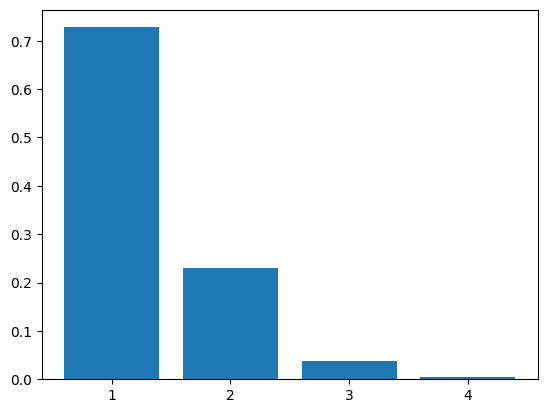

In [153]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import matplotlib.pyplot as plt
  
iris = fetch_ucirepo(id=53) 
X = iris.data.features 
y = iris.data.targets 

X = (X - X.mean()) / X.std()
X = np.array(X)

cov_matrix = 1/(X.shape[0] - 1) * (X.T @ X)

evalues, evectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(evalues)[::-1]

evalues_sorted = evalues[sorted_indices]
V = evectors[:, sorted_indices] # each column is a PC !
print("Matrix V", V)

total_variance = np.sum(evalues_sorted)
portions = evalues_sorted / total_variance
plt.bar(range(1, len(portions)+1), portions)
plt.xticks(range(1, len(portions)+1))

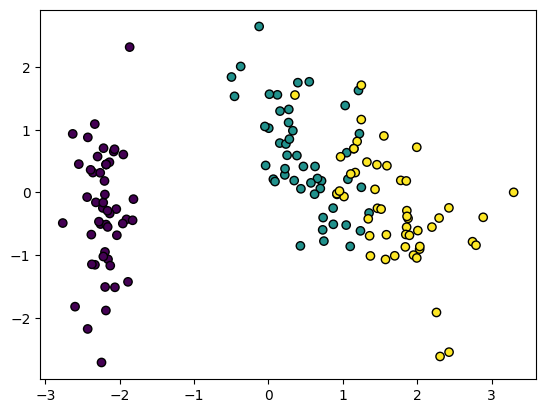

In [154]:
# first two PCs
pc1 = V[:, 0] 
pc2 = V[:, 1]  
V_2pcs = np.stack((pc1, pc2), axis=1)
X_2pcs = X @ V_2pcs

y_encoded = np.unique(y, return_inverse=True)[1]
plt.scatter(X_2pcs[:, 0], X_2pcs[:, 1], c=y_encoded, edgecolor='k')

In [163]:
import plotly.express as px
import pandas as pd

pc1 = V[:, 0]
pc2 = V[:, 1]
pc3 = V[:, 2]

V_3pcs = np.stack((pc1, pc2, pc3), axis=1)
X_3pcs = X @ V_3pcs

y_encoded = np.unique(y, return_inverse=True)[1]

df = pd.DataFrame(X_3pcs, columns=['PC1', 'PC2', 'PC3'])
df['label'] = y_encoded

fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color='label')

fig.show()


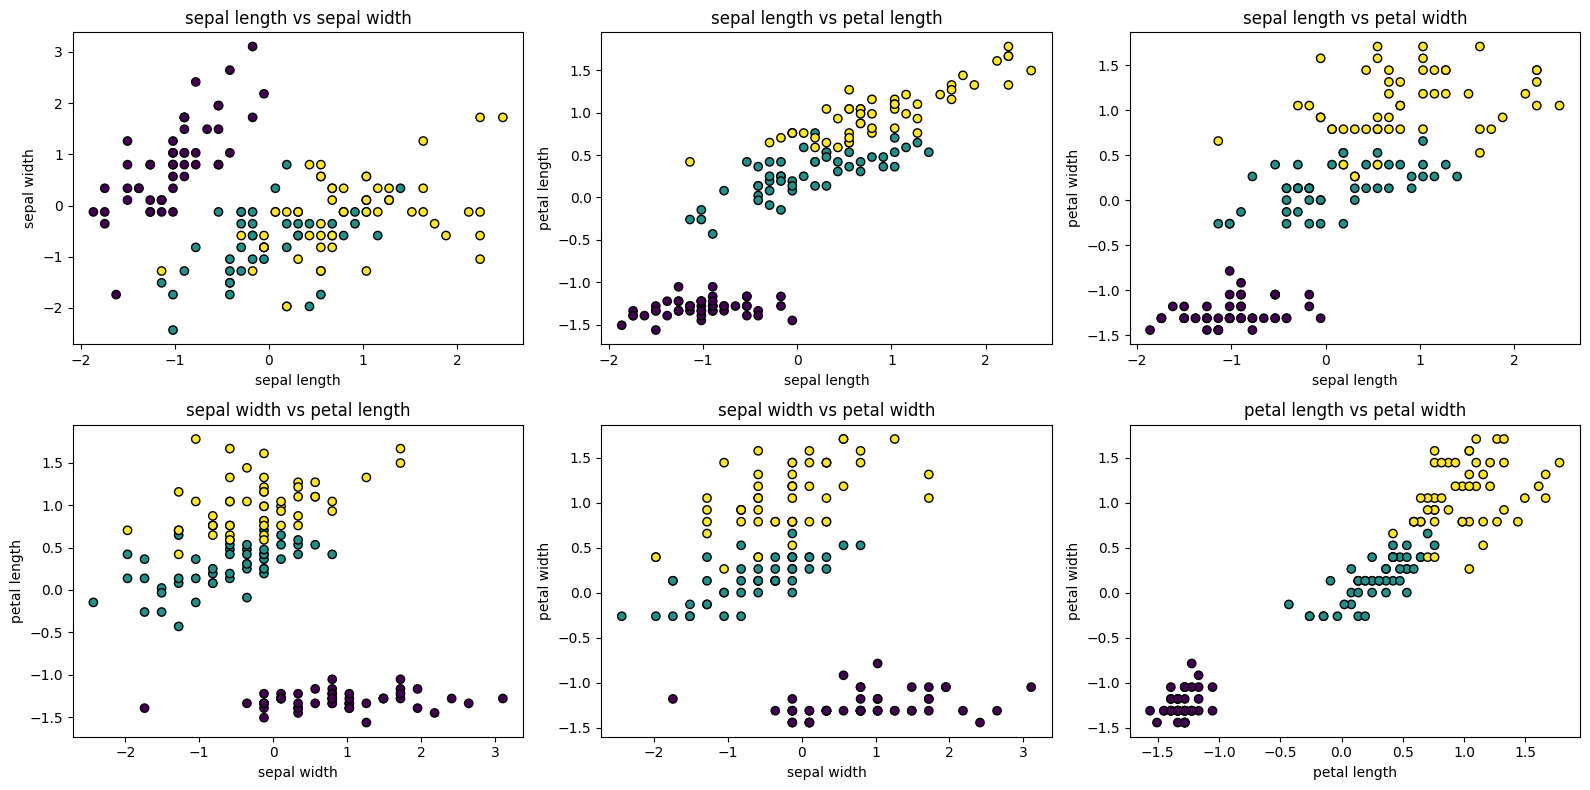

In [164]:
from itertools import combinations

X = iris.data.features 
X = (X - X.mean()) / X.std()
y = iris.data.targets 
feature_pairs = combinations(range(X.shape[1]), 2)

fig, axes = plt.subplots(2, 3, figsize=(16, 8))

for i, (f1, f2) in enumerate(feature_pairs):
    row = i // 3 
    col = i % 3   
    ax = axes[row, col]  

    ax.scatter(X.iloc[:, f1], X.iloc[:, f2], c=y_encoded, edgecolor='k')
    ax.set_xlabel(X.columns[f1])  
    ax.set_ylabel(X.columns[f2])  
    ax.set_title(f'{X.columns[f1]} vs {X.columns[f2]}')  

plt.tight_layout()
plt.show()